<h1 align='center'>Image and Video Processing</h1>
<h1 align='center'>Assignment 2</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Table of Contents
- [Importing Libraries](#1)
- [Importing Images](#2)
- [Question 1 - Gray Scale Point Operations](#3)
    - [Linear Point Operations](#4)
    - [Full Scale Contrast Stretch](#5)
    - [Log Magnitude Compression](#6)
    - [Gamma Correction](#7)
    - [Histogram Flattening](#8)
    - [Testing above implementations using NASA's images](#9)
- [Question 2 - Image Zooming](#10)
    - [Zoom using Nearest Neighbor algorithm](#11)
    - [Zoom using Bilinear Interpolaiton](#12)
    - [Testing using NASA's images](#13)
- [Question 3 - 2D-DFT](#14)
    - [DFT from First Principles](#15)
    - [DFT from Matrix Multiplication using complex exponentials](#16)
    - [IDFT from First Principles](#24)
    - [IDFT from Matrix Multiplication using complex exponentials](#25)
    - [Displaying results](#17)
    - [Centered DFT](#18)
    - [Image Reconstruction](#19)
    - [Showing importance of phase by-](#20)
        - [Transposing phase matrix](#21)
        - [Setting phase matrix to zero](#22)
        - [Adding Gaussian noise to phase matrix](#23)

<a name = '1'></a>
# Importing Libraries

In [1]:
import numpy as np
from numpy import linalg as LA
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

<a name = '2'></a>
# Importing Images

In [2]:
#APC image from Assignment 1
apc = np.array(img.imread('7.1.08.tiff'), dtype = "int")

# Enceladus Cassini - https://apod.nasa.gov/apod/ap230205.html
enceladus = np.array(Image.open('enceladus12_cassini_960.jpg').convert("L"), dtype = "int")

# NGC 6355 - https://apod.nasa.gov/apod/ap230130.html
ngc6355 = np.array(Image.open('ngc6355_hubble_1080.jpg').convert("L"), dtype = "int")

# Young Star Cluster - https://apod.nasa.gov/apod/ap230113.html
star_cluster = np.array(Image.open('jwst-ngc346.png').convert("L"), dtype = "int")

# Horsehead Nebula - https://apod.nasa.gov/apod/ap220921.html
horsehead_nebula = np.array(Image.open('HorseheadIr_HubbleNachman_960.jpg').convert("L"), dtype = "int")

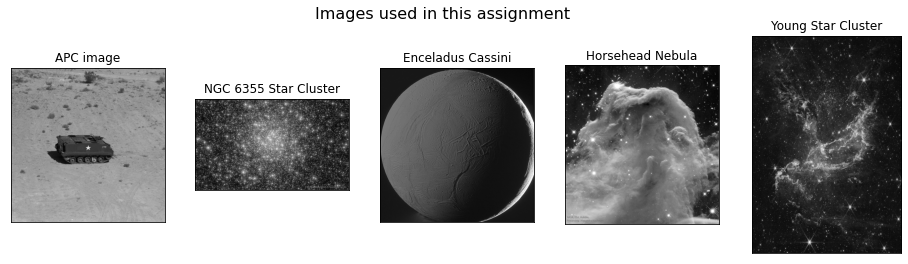

In [3]:
fig = plt.figure(figsize = (16, 4))
fig.suptitle("Images used in this assignment", size = 16)

plt.subplot(1, 5, 1)
plt.imshow(apc, cmap = 'gray')
plt.title("APC image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 2)
plt.imshow(ngc6355, cmap = 'gray')
plt.title("NGC 6355 Star Cluster")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 3)
plt.imshow(enceladus, cmap = 'gray')
plt.title("Enceladus Cassini")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 4)
plt.imshow(horsehead_nebula, cmap = 'gray')
plt.title("Horsehead Nebula")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 5)
plt.imshow(star_cluster, cmap = 'gray')
plt.title("Young Star Cluster")
plt.xticks([])
plt.yticks([])

plt.show()

<a name = '3'></a>
# Question 1 - Gray Scale Point Operations

## Linear Point Operations<a name = '4'></a>

In [4]:
def LinearPointOperation(image, P, L):
    new_image = np.floor(P * image + L)
    new_image[new_image > 255] = 255
    return new_image

def returnHistogram(image):
    flatten_image = np.array(image.flatten(), dtype = "int")
    histogram = np.zeros(256)
    
    for i in flatten_image:
        histogram[i] += 1
    
    return histogram

In [5]:
I = enceladus

hist_I = returnHistogram(I)
J_a = returnHistogram(LinearPointOperation(I, 1.5, 0))
J_b = returnHistogram(LinearPointOperation(I, 1, 50))
J_c = returnHistogram(LinearPointOperation(I, 1.5, 50))

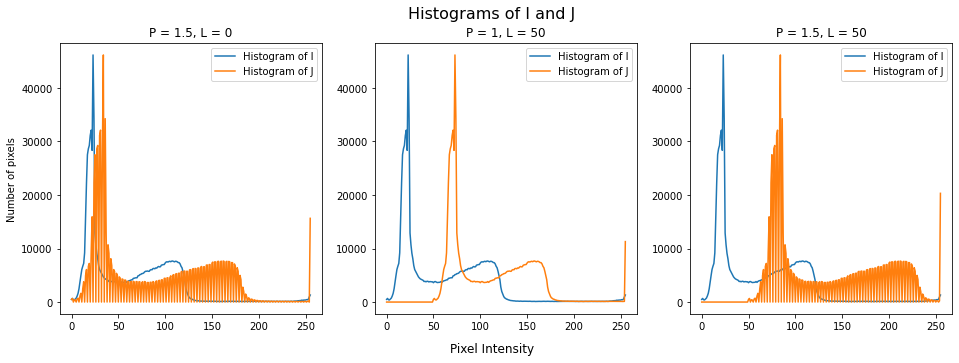

In [6]:
x = np.arange(len(hist_I))
fig = plt.figure(figsize = (16, 5))
fig.suptitle("Histograms of I and J", size = 16)
fig.supxlabel("Pixel Intensity")

plt.subplot(1, 3, 1)
plt.title("P = 1.5, L = 0")
plt.ylabel("Number of pixels")
plt.plot(x, hist_I)
plt.plot(x, J_a)
plt.legend(["Histogram of I", "Histogram of J"])

plt.subplot(1, 3, 2)
plt.title("P = 1, L = 50")
plt.plot(x, hist_I)
plt.plot(x, J_b)
plt.legend(["Histogram of I", "Histogram of J"])

plt.subplot(1, 3, 3)
plt.title("P = 1.5, L = 50")
plt.plot(x, hist_I)
plt.plot(x, J_c)
plt.legend(["Histogram of I", "Histogram of J"])

plt.show()

- In the first case the histogram shifts to right side in a non-uniform fashion and has alternate positions filled with zeros. Also due to clipping, the number of pixels at 255 has shot up.
- In the second case the histogram shifts to the right side in a uniform fashion, i.e. the envelope is maintained.
- In the third case the histogram both shifts right and has alternate 0's

Clearly the histograms of J are as expected when compared with histograms of I.

## Full Scale Contrast Stretch<a name = '5'></a>

In [7]:
def applyFSCS(image):
    A, B = np.min(image), np.max(image)
    K = 256
    P = (K - 1) / (B - A)
    L = -A * P
    
    fscs_image = LinearPointOperation(image, P, L)
    return fscs_image

In [8]:
hist_apc = returnHistogram(apc)
fscs_apc = applyFSCS(apc)
hist_fscs_apc = returnHistogram(fscs_apc)

In [9]:
print(f"Minimum and Maximum intensity for APC image: {np.min(apc)} and {np.max(apc)}")
print(f"Minimum and Maximum intensity for APC image after FSCS: {np.min(fscs_apc)} and {np.max(fscs_apc)}")

Minimum and Maximum intensity for APC image: 12 and 215
Minimum and Maximum intensity for APC image after FSCS: 0.0 and 255.0


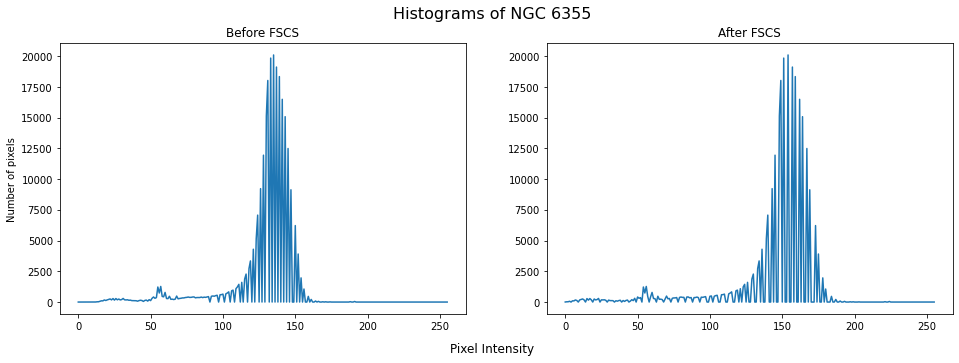

In [10]:
fig = plt.figure(figsize = (16, 5))
fig.suptitle("Histograms of NGC 6355", size = 16)
fig.supxlabel("Pixel Intensity")

plt.subplot(1, 2, 1)
plt.title("Before FSCS")
plt.ylabel("Number of pixels")
plt.plot(x, hist_apc)

plt.subplot(1, 2, 2)
plt.title("After FSCS")
plt.plot(x, hist_fscs_apc)

plt.show()

## Log Magnitude Compression<a name = '6'></a>

In [11]:
def logCompression(image):
    image = np.array(image)
    return applyFSCS(np.log(1 + image))

In [12]:
hist_ngc6355 = returnHistogram(ngc6355)

In [13]:
log_comp_ngc6355 = logCompression(ngc6355)
hist_log_comp_ngc6355 = returnHistogram(log_comp_ngc6355)

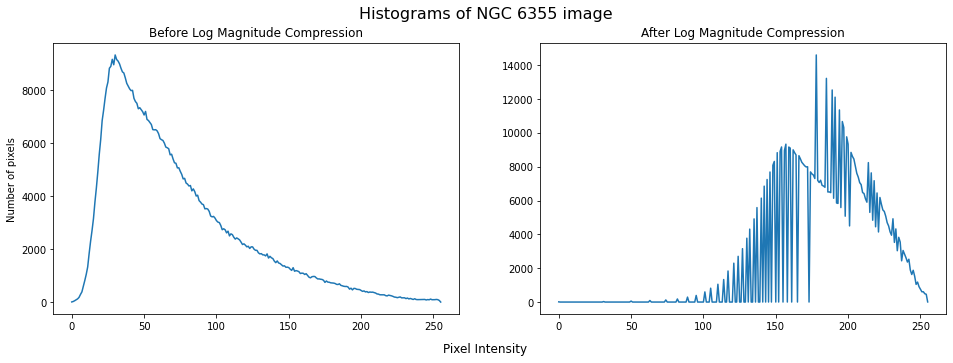

In [14]:
fig = plt.figure(figsize = (16, 5))
fig.suptitle("Histograms of NGC 6355 image", size = 16)
fig.supxlabel("Pixel Intensity")

plt.subplot(1, 2, 1)
plt.title("Before Log Magnitude Compression")
plt.ylabel("Number of pixels")
plt.plot(x, hist_ngc6355)

plt.subplot(1, 2, 2)
plt.title("After Log Magnitude Compression")
plt.plot(x, hist_log_comp_ngc6355)

plt.show()

## Gamma Correction<a name = '7'></a>

In [15]:
def gammaCorrection(image):
    J = np.power(image, 1.4)
    J = np.array(J, dtype = int)
    J[J > 255] = 255
    return J

In [16]:
gamma_ngc6355 = gammaCorrection(ngc6355)
hist_gamma_ngc6355 = returnHistogram(gamma_ngc6355)

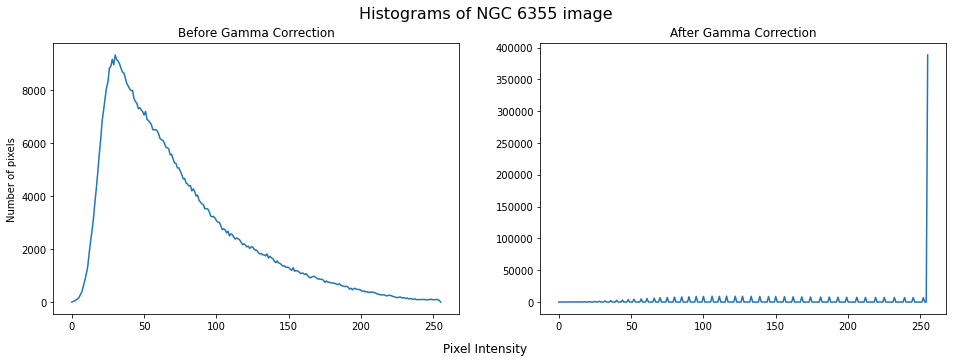

In [17]:
fig = plt.figure(figsize = (16, 5))
fig.suptitle("Histograms of NGC 6355 image", size = 16)
fig.supxlabel("Pixel Intensity")

plt.subplot(1, 2, 1)
plt.title("Before Gamma Correction")
plt.ylabel("Number of pixels")
plt.plot(x, hist_ngc6355)

plt.subplot(1, 2, 2)
plt.title("After Gamma Correction")
plt.plot(x, hist_gamma_ngc6355)

plt.show()

## Histogram Flattening<a name = '8'></a>

In [18]:
def returnCDF(histogram):
    n = len(histogram)
    CDF = np.zeros(n)
    CDF[0] = histogram[0]
    for i in range(1, n):
        CDF[i] = CDF[i - 1] + histogram[i]
    return CDF

def flattenHistogram(image):
    m, n = image.shape[0], image.shape[1]
    hist_image = returnHistogram(image) / (m * n)
    CDF_image = returnCDF((hist_image))
    J = CDF_image[image]
    J = applyFSCS(J)
    return J

In [19]:
flatten_ngc6355 = flattenHistogram(ngc6355)
hist_flatten_ngc6355 = returnHistogram(flatten_ngc6355)

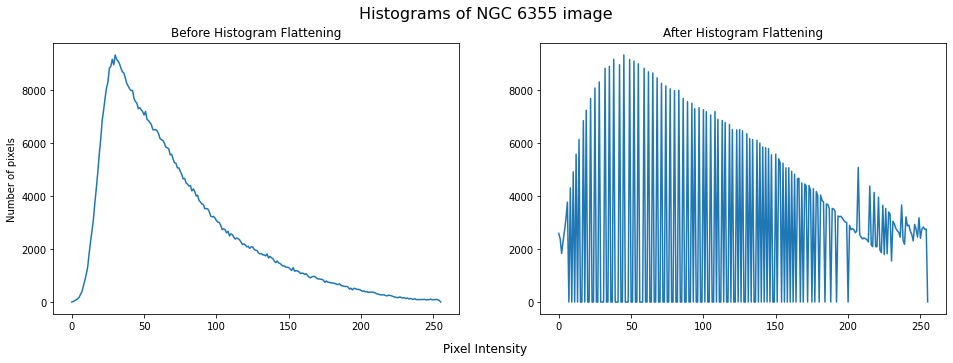

In [20]:
fig = plt.figure(figsize = (16, 5))
fig.suptitle("Histograms of NGC 6355 image", size = 16)
fig.supxlabel("Pixel Intensity")

plt.subplot(1, 2, 1)
plt.title("Before Histogram Flattening")
plt.ylabel("Number of pixels")
plt.plot(x, hist_ngc6355)

plt.subplot(1, 2, 2)
plt.title("After Histogram Flattening")
plt.plot(x, hist_flatten_ngc6355)

plt.show()

## Testing above implementations using NASA's images<a name = '9'></a>

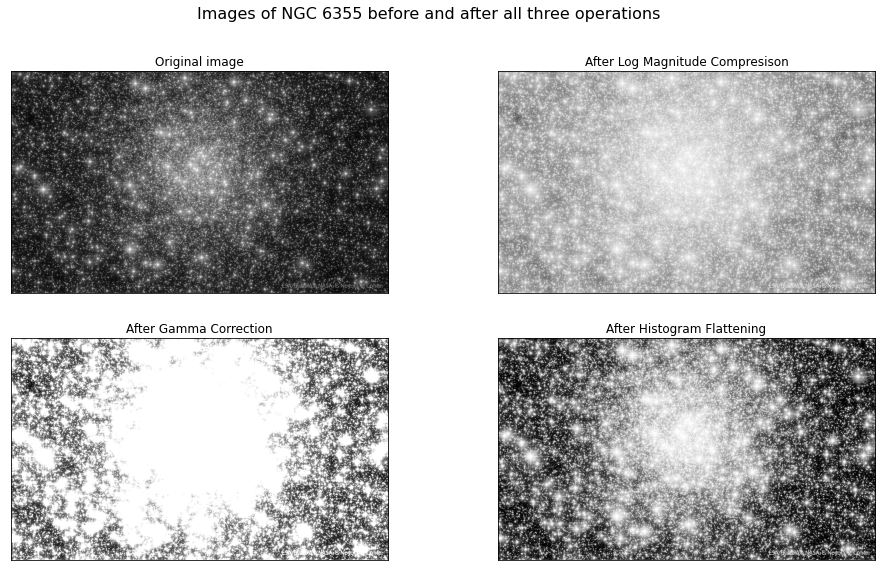

In [21]:
fig = plt.figure(figsize = (16, 9))
fig.suptitle("Images of NGC 6355 before and after all three operations", size = 16)

plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title("After Log Magnitude Compresison")
plt.imshow(log_comp_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title("After Gamma Correction")
plt.imshow(gamma_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title("After Histogram Flattening")
plt.imshow(flatten_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

- In the log compressed image, the brightness of background and faint stars have been enhanced as a result of steep scaling. 
- The gamma correction increases the number of white pixels due to intensity clipping at 255.
- In the histogram flattened image, the brightness of stars has increased drastically and the background has retained it's intensity as opposed to log-magnitude compressed image.

In summary, we use Histogram Flattening to enhance the details of fainter objects of the image while keeping the background intensities.

<a name = '10'></a>
# Question 2 - Image Zooming

## Zoom using Nearest Neighbor algorithm<a name = '11'></a>

In [22]:
def NearestNeighborScaling(image, scale):
    m, n = image.shape[0], image.shape[1]
    
    m_new = int(np.ceil(m * scale))
    n_new = int(np.ceil(n * scale))
    
    scaled_image = np.zeros([m_new, n_new])
    
    sx = (m - 1) / (m_new - 1)
    sy = (n - 1) / (n_new - 1)
    
    for i in range(m_new):
        for j in range(n_new):
            nearest_i = int(np.floor(sx * i) + np.ceil(max(0, 0.5 - ((sx * i) % 1)))) - 1
            nearest_j = int(np.floor(sy * j) + np.ceil(max(0, 0.5 - ((sy * j) % 1)))) - 1
    
            scaled_image[i, j] = image[nearest_i, nearest_j]
    
    return scaled_image

## Zoom using Bilinear Interpolaiton<a name = '12'></a>

In [23]:
def BilinearInterpolation(image, scale):
    m, n = image.shape[0], image.shape[1]
    
    m_new = int(np.ceil(m * scale))
    n_new = int(np.ceil(n * scale))
    
    scaled_image = np.zeros([m_new, n_new])
    
    pre_computed_coeff_x = np.zeros([m, n - 1, 2])
    pre_computed_coeff_y = np.zeros([m - 1, n, 2])
    pre_computed_coeff_4 = np.zeros([m - 1, n - 1, 4])
    
    for i in range(m - 1):
        for j in range(n - 1):
            i1, j1 = i + 1, j + 1
            
            mat_x = np.array([[1, j], [1, j1]])
            I_x = np.array([image[i, j], image[i, j1]]) 
            pre_computed_coeff_x[i, j, :] = np.matmul(LA.inv(mat_x), I_x)
            
            mat_y = np.array([[1, i], [1, i1]])
            I_y = np.array([image[i, j], image[i1, j]])
            pre_computed_coeff_y[i, j, :] = np.matmul(LA.inv(mat_y), I_y)
            
            mat_4 = np.array([[1, i, j, i * j], [1, i, j1, i * j1], 
                              [1, i1, j1, i1 * j1], [1, i1, j, i1 * j]])
            I_4 = np.array([image[i, j], image[i, j1], image[i1, j1], image[i1, j]])
            pre_computed_coeff_4[i, j, :] = np.matmul(LA.inv(mat_4), I_4)
    
    i = m - 1
    for j in range(n - 1):
        j1 = j + 1
            
        mat_x = np.array([[1, j], [1, j1]])
        I_x = np.array([image[i, j], image[i, j1]])
        pre_computed_coeff_x[i, j, :] = np.matmul(LA.pinv(mat_x), I_x)
        
    j = n - 1
    for i in range(m - 1):
        i1 = i + 1
            
        mat_y = np.array([[1, i], [1, i1]])
        I_y = np.array([image[i, j], image[i1, j]])
        pre_computed_coeff_y[i, j, :] = np.matmul(LA.pinv(mat_y), I_y)
    
    sx = (m - 1) / (m_new - 1)
    sy = (n - 1) / (n_new - 1)
    
    for si in range(m_new):
        for sj in range(n_new):
            i, j = sx * si, sy * sj
            i1, j1 = int(i), int(j)

            if i % 1 == 0 and j % 1 == 0:
                scaled_image[si, sj] = image[i1, j1]
                continue
                
            elif i % 1 == 0:
                coeffs = pre_computed_coeff_x[i1, j1, :]
                ind = np.array([1, j])
            
            elif j % 1 == 0:
                coeffs = pre_computed_coeff_y[i1, j1, :]
                ind = np.array([1, i])
            
            else:
                coeffs = pre_computed_coeff_4[i1, j1, :]
                ind = np.array([1, i, j, i * j])
                
            scaled_image[si, sj] = int(np.dot(coeffs, ind))
    
    return scaled_image

## Testing using NASA's images<a name = '13'></a>

In [24]:
nearest_neighbor_ngc6355 = NearestNeighborScaling(ngc6355, 1.5)
bilinear_ngc6355 = BilinearInterpolation(ngc6355, 1.5)

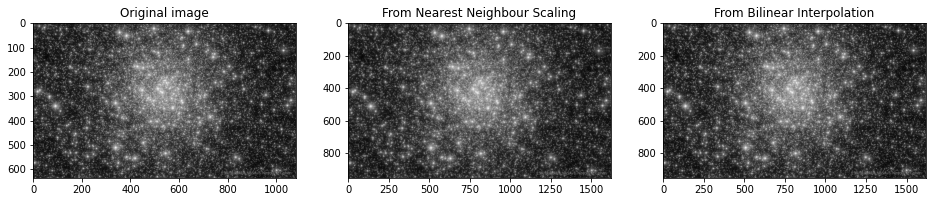

In [25]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(ngc6355, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("From Nearest Neighbour Scaling")
plt.imshow(nearest_neighbor_ngc6355, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("From Bilinear Interpolation")
plt.imshow(bilinear_ngc6355, cmap = 'gray')

plt.show()

In [26]:
nearest_neighbor_star_cluster = NearestNeighborScaling(star_cluster, 1.5)
bilinear_star_cluster = BilinearInterpolation(star_cluster, 1.5)

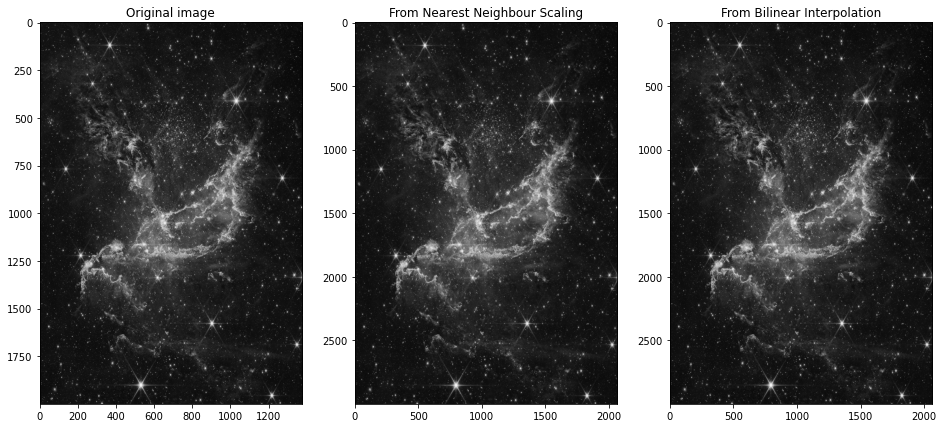

In [27]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(star_cluster, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("From Nearest Neighbour Scaling")
plt.imshow(nearest_neighbor_star_cluster, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("From Bilinear Interpolation")
plt.imshow(bilinear_star_cluster, cmap = 'gray')

plt.show()

In [28]:
nearest_neighbor_horsehead_nebula = NearestNeighborScaling(horsehead_nebula, 1.5)
bilinear_horsehead_nebula = BilinearInterpolation(horsehead_nebula, 1.5)

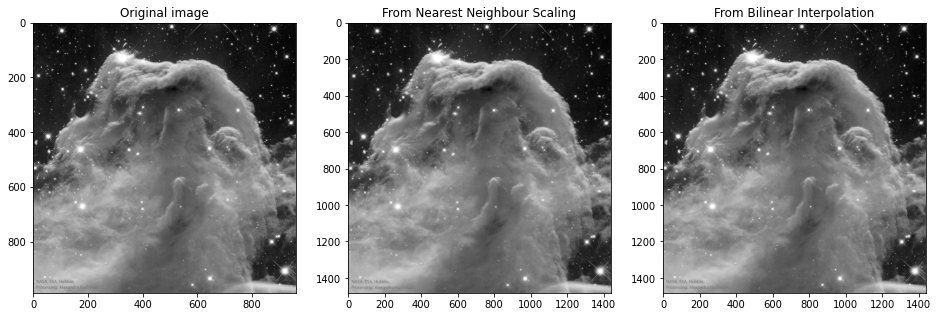

In [29]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(horsehead_nebula, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("From Nearest Neighbour Scaling")
plt.imshow(nearest_neighbor_horsehead_nebula, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("From Bilinear Interpolation")
plt.imshow(bilinear_horsehead_nebula, cmap = 'gray')

plt.show()

- By eye, it is hard to distinguish the zoomed images due to the small scale factor but we can definitely see the change in dimensions of the image and zoomed versions.
- Analytically, we can safely say that Bilinear Interpolation gives a better zoomed version due to the defined smoothness prior as opposed to just filling in pixels with nearest neighbors.
- But Bilinear Interpolation is clearly more computationally expensive due to calculation of matrix inverses and products whereas we just assign nearest pixels in the nearest neighbor scaling. 
- The time complexity for both is O(MN) as we are going through every pixel, but the total time taken to run Bilinear Interpolation is higher than Nearest Neighbor scaling.
- Hence for low values of zoom, we can use nearest neighbor scaling and use bilinear interpolation for higher values of zoom.

In [30]:
# To better compare the images, you can save using the below code-
# Image.fromarray(ngc6355.astype(np.uint8)).save('ngc6355.jpg')
# Image.fromarray(nearest_neighbor_ngc6355.astype(np.uint8)).save('nearest_neighbor_ngc6355.jpg')
# Image.fromarray(bilinear_ngc6355.astype(np.uint8)).save('bilinear_ngc6355.jpg')

# Image.fromarray(star_cluster.astype(np.uint8)).save('star_cluster.jpg')
# Image.fromarray(nearest_neighbor_star_cluster.astype(np.uint8)).save('nearest_neighbor_star_cluster.jpg')
# Image.fromarray(bilinear_star_cluster.astype(np.uint8)).save('bilinear_star_cluster.jpg')

# Image.fromarray(horsehead_nebula.astype(np.uint8)).save('horsehead_nebula.jpg')
# Image.fromarray(nearest_neighbor_horsehead_nebula.astype(np.uint8)).save('nearest_neighbor_horsehead_nebula.jpg')
# Image.fromarray(bilinear_horsehead_nebula.astype(np.uint8)).save('bilinear_horsehead_nebula.jpg')

<a name = '14'></a>
# Question 3 - 2D-DFT

## DFT from First Principles<a name = '15'></a>

In [31]:
def firstprinciplesDFT(image):
    M, N = image.shape
    dft_image = np.zeros([M, N], dtype = complex)
    temp_result = np.zeros([M, N], dtype = complex)
    
    for v in range(N):
        for m in range(M):
            for n in range(N):
                temp_result[m][v] += image[m, n] * np.exp(-2j * np.pi * v * n / N)
    
    for u in range(M):
        for v in range(N):
            for m in range(M):
                dft_image[u][v] += temp_result[m][v] * np.exp(-2j * np.pi * u * m / N)
    
    return dft_image

## DFT from Matrix Multiplication using complex exponentials<a name = '16'></a>

In [32]:
def matrixDFT(image):
    M, N = image.shape
    W_N = np.zeros([N, N], dtype = complex)
    
    for i in range(N):
        for j in range(N):
            W_N[i, j] = np.exp(-2j * np.pi * i * j / N)
    
    dft_image = W_N @ image @ W_N
    return dft_image

In [33]:
def logTransformation(image):
    return applyFSCS(np.log(1 + np.abs(image)))

## IDFT from First Principles<a name = '24'></a>

In [34]:
def firstprinciplesIDFT(dft_image):
    M, N = dft_image.shape
    idft_image = np.zeros([M, N], dtype = complex)
    temp_result = np.zeros([M, N], dtype = complex)

    for n in range(N):
        for u in range(M):
            for v in range(N):
                temp_result[u][n] += dft_image[u, v] * np.exp(2j * np.pi * n * v / N)
    
    for m in range(M):
        for n in range(N):
            for u in range(M):
                idft_image[m][n] += temp_result[u][n] * np.exp(2j * np.pi * m * u / N)
    
    return idft_image

## IDFT from Matrix Multiplication using complex exponentials<a name = '25'></a>

In [35]:
def matrixIDFT(dft_image):
    M, N = dft_image.shape
    W_N = np.zeros([N, N], dtype = complex)
    
    for i in range(N):
        for j in range(N):
            W_N[i, j] = np.exp(2j * np.pi * i * j / N) / N
    
    idft_image = W_N @ dft_image @ W_N
    return np.real(idft_image)

## Displaying results<a name = '17'></a>

In [36]:
crop_ngc6355 = ngc6355[62:574, 284:796]
crop_horsehead = horsehead_nebula[:512, :512]
crop_star_cluster = star_cluster[500:1524, :1024]

In [37]:
dft_ngc6355 = matrixDFT(crop_ngc6355)
dft_log_mag_ngc6355 = logTransformation(np.abs(dft_ngc6355))

dft_horsehead = matrixDFT(crop_horsehead)
dft_log_mag_horsehead = logTransformation(np.abs(dft_horsehead))

dft_star_cluster = matrixDFT(crop_star_cluster)
dft_log_mag_star_cluster = logTransformation(np.abs(dft_star_cluster))

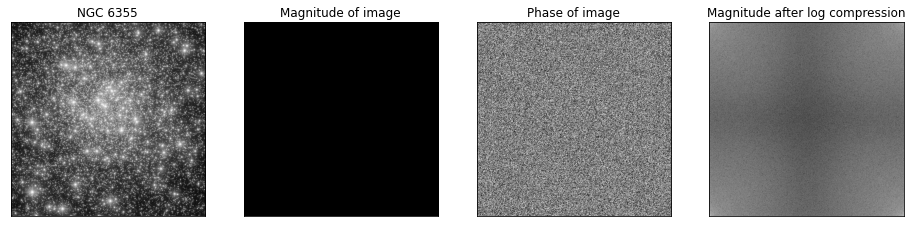

In [38]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 4, 1)
plt.title("NGC 6355")
plt.imshow(crop_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 2)
plt.title("Magnitude of image")
plt.imshow(np.abs(dft_ngc6355), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 3)
plt.title("Phase of image")
plt.imshow(np.angle(dft_ngc6355), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.title("Magnitude after log compression")
plt.imshow(dft_log_mag_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

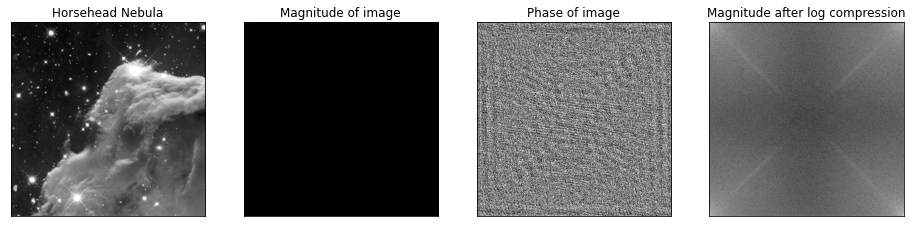

In [39]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 4, 1)
plt.title("Horsehead Nebula")
plt.imshow(crop_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 2)
plt.title("Magnitude of image")
plt.imshow(np.abs(dft_horsehead), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 3)
plt.title("Phase of image")
plt.imshow(np.angle(dft_horsehead), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.title("Magnitude after log compression")
plt.imshow(dft_log_mag_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

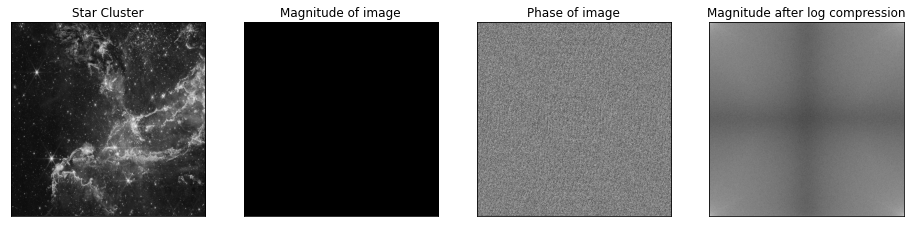

In [40]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 4, 1)
plt.title("Star Cluster")
plt.imshow(crop_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 2)
plt.title("Magnitude of image")
plt.imshow(np.abs(dft_star_cluster), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 3)
plt.title("Phase of image")
plt.imshow(np.angle(dft_star_cluster), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.title("Magnitude after log compression")
plt.imshow(dft_log_mag_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

## Centered DFT<a name = '18'></a>

In [41]:
def centeredDFT(image):
    M, N = image.shape
    centered_image = np.zeros([M, N])
    for i in range(M):
        for j in range(N):
            centered_image[i][j] = ((-1) ** (i + j)) * image[i][j]
    centered_dft = matrixDFT(centered_image)
    return centered_dft

In [42]:
cent_dft_ngc6355 = centeredDFT(crop_ngc6355)
cent_dft_log_mag_ngc6355 = logTransformation(np.abs(cent_dft_ngc6355))

cent_dft_horsehead = centeredDFT(crop_horsehead)
cent_dft_log_mag_horsehead = logTransformation(np.abs(cent_dft_horsehead))

cent_dft_star_cluster = centeredDFT(crop_star_cluster)
cent_dft_log_mag_star_cluster = logTransformation(np.abs(cent_dft_star_cluster))

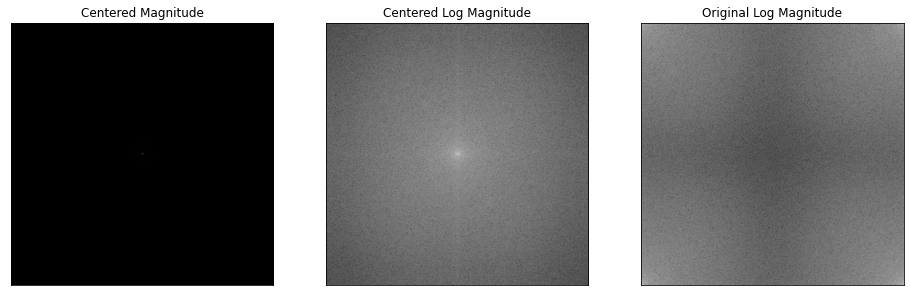

In [43]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 3, 1)
plt.title("Centered Magnitude")
plt.imshow(np.abs(cent_dft_ngc6355), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.title("Centered Log Magnitude")
plt.imshow(cent_dft_log_mag_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.title("Original Log Magnitude")
plt.imshow(dft_log_mag_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

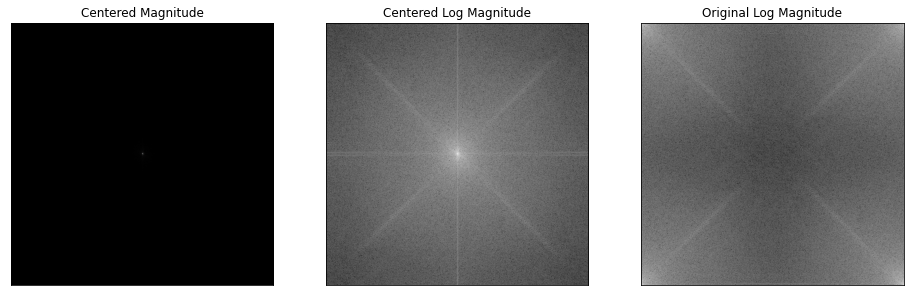

In [44]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 3, 1)
plt.title("Centered Magnitude")
plt.imshow(np.abs(cent_dft_horsehead), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.title("Centered Log Magnitude")
plt.imshow(cent_dft_log_mag_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.title("Original Log Magnitude")
plt.imshow(dft_log_mag_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

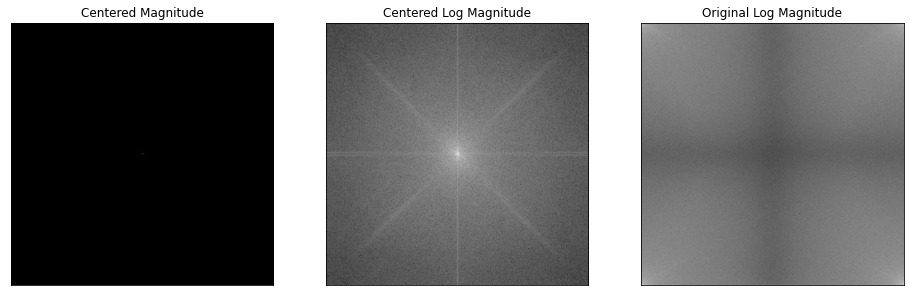

In [45]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 3, 1)
plt.title("Centered Magnitude")
plt.imshow(np.abs(cent_dft_star_cluster), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.title("Centered Log Magnitude")
plt.imshow(cent_dft_log_mag_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.title("Original Log Magnitude")
plt.imshow(dft_log_mag_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

## Image Reconstruction<a name = '19'></a>

In [46]:
idft_ngc6355 = matrixIDFT(dft_ngc6355)
idft_horsehead = matrixIDFT(dft_horsehead)
idft_star_cluster = matrixIDFT(dft_star_cluster)

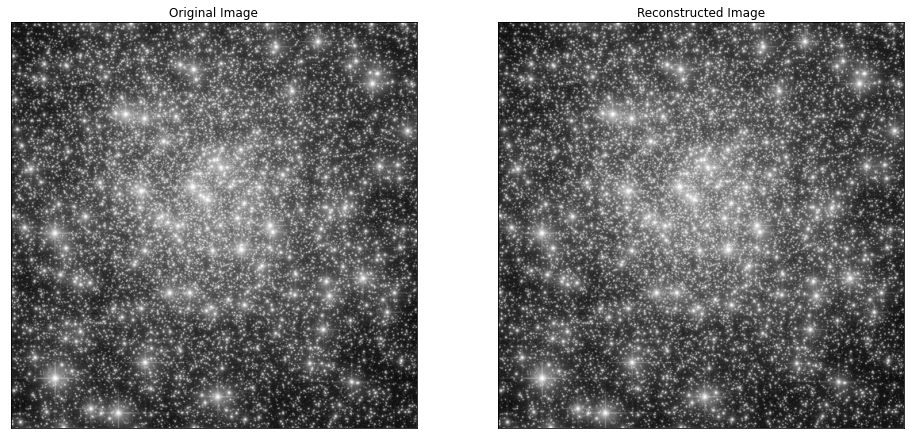

In [47]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(np.abs(idft_ngc6355), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

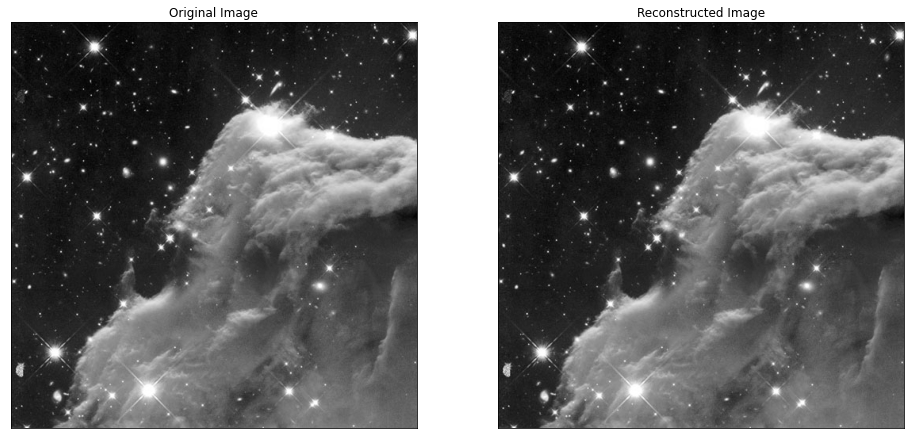

In [48]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(np.abs(idft_horsehead), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

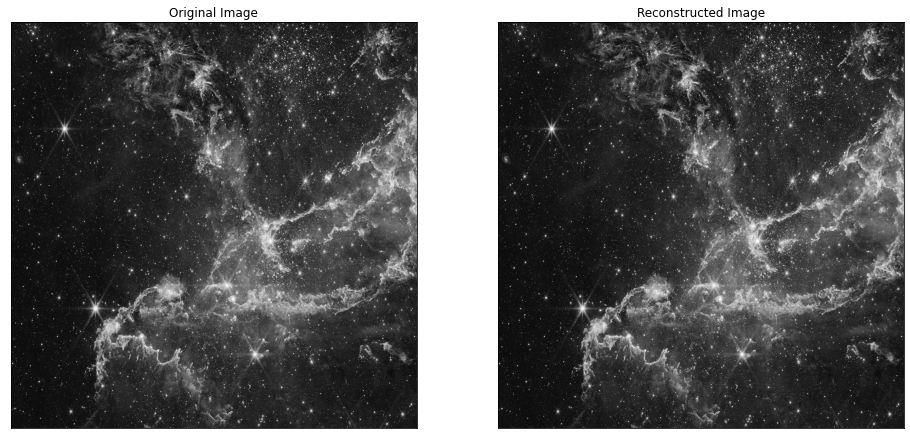

In [49]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(np.abs(idft_star_cluster), cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

## Showing importance of phase by-<a name = '20'></a>

### Transposing phase matrix<a name = '21'></a>

In [50]:
def transposePhase(image):
    dft_image = matrixDFT(image)
    phase = np.angle(dft_image)
    new_phase = phase.T
    new_dft_image = np.abs(dft_image) * np.exp(1j * new_phase)
    new_image = np.abs(matrixIDFT(new_dft_image))
    return new_image

In [51]:
new_ngc6355 = transposePhase(crop_ngc6355)
new_horsehead = transposePhase(crop_horsehead)
new_star_cluster = transposePhase(crop_star_cluster)

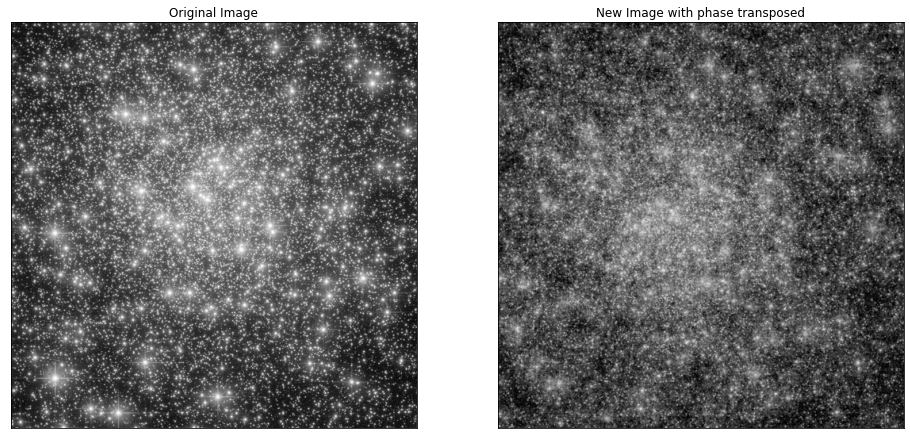

In [52]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with phase transposed")
plt.imshow(new_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

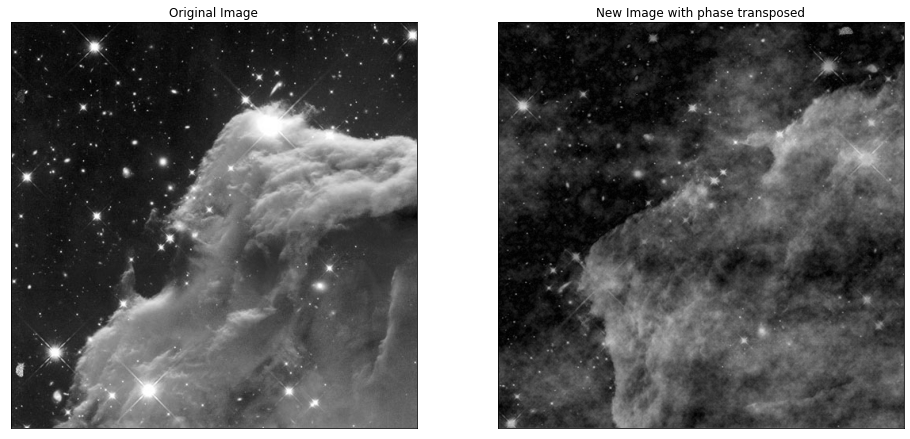

In [53]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with phase transposed")
plt.imshow(new_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

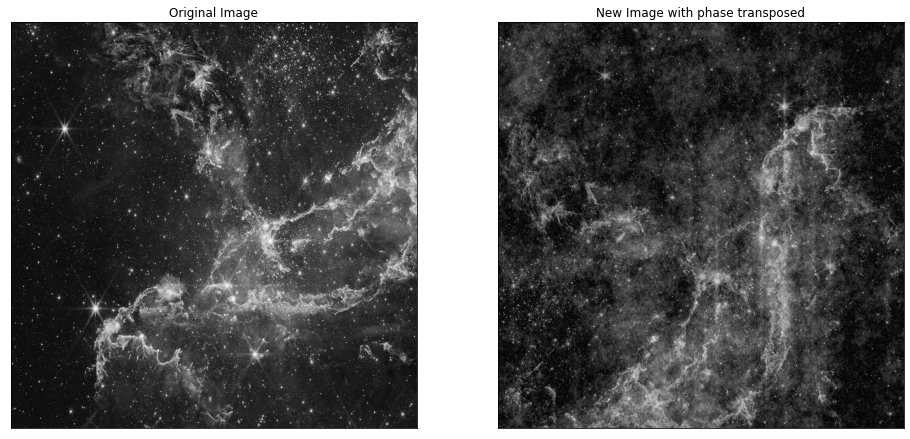

In [54]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with phase transposed")
plt.imshow(new_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

### Setting phase matrix to zero<a name = '22'></a>

In [55]:
def zeroPhase(image):
    dft_image = matrixDFT(image)
    new_dft_image = np.abs(dft_image)
    new_image = np.abs(matrixIDFT(new_dft_image))
    return new_image

In [56]:
new_ngc6355 = zeroPhase(crop_ngc6355)
new_horsehead = zeroPhase(crop_horsehead)
new_star_cluster = zeroPhase(crop_star_cluster)

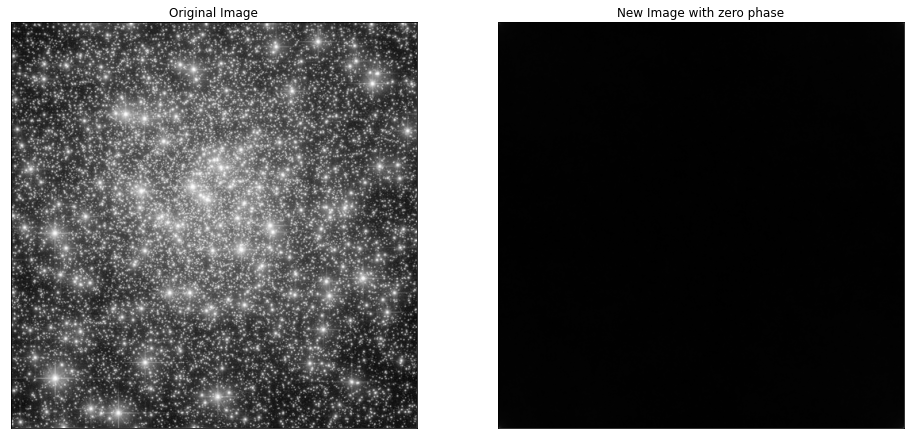

In [57]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with zero phase")
plt.imshow(new_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

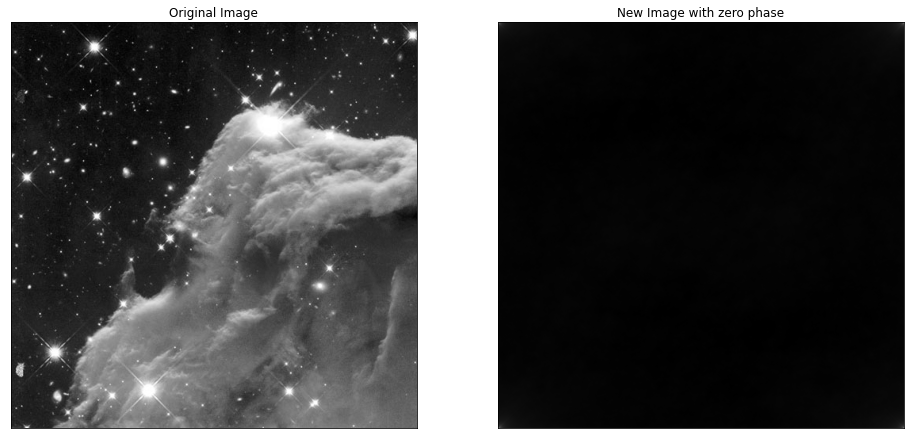

In [58]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with zero phase")
plt.imshow(new_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

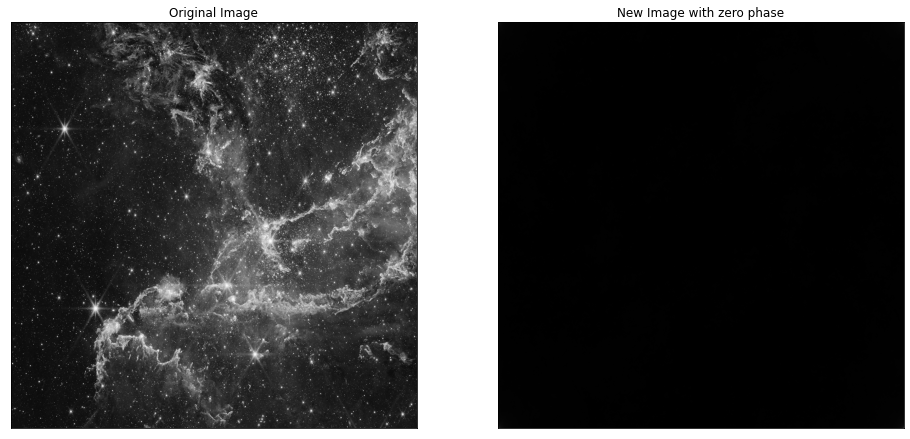

In [59]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with zero phase")
plt.imshow(new_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

### Adding Gaussian noise to phase matrix<a name = '23'></a>

In [60]:
def addNoisePhase(image):
    dft_image = matrixDFT(image)
    phase = np.angle(dft_image)
    new_phase = phase + np.random.normal(0, 3, size = phase.shape)
    new_dft_image = np.abs(dft_image) * np.exp(1j * new_phase)
    new_image = np.abs(matrixIDFT(new_dft_image))
    return new_image

In [61]:
new_ngc6355 = addNoisePhase(crop_ngc6355)
new_horsehead = addNoisePhase(crop_horsehead)
new_star_cluster = addNoisePhase(crop_star_cluster)

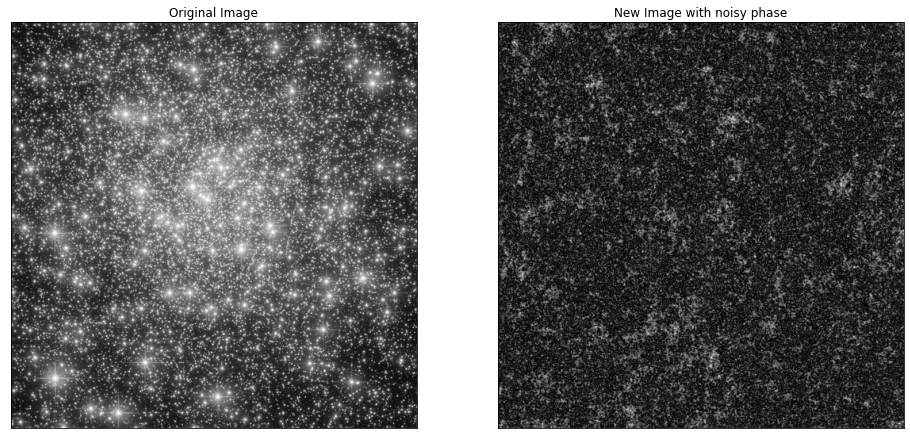

In [62]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with noisy phase")
plt.imshow(new_ngc6355, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

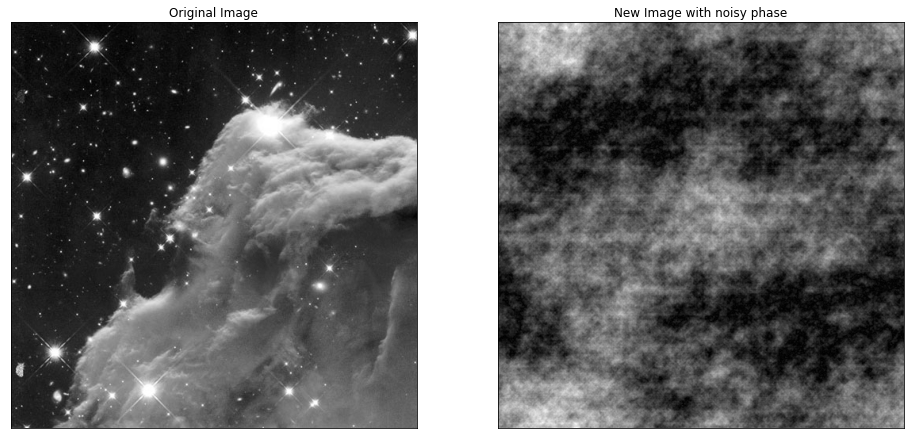

In [63]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with noisy phase")
plt.imshow(new_horsehead, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

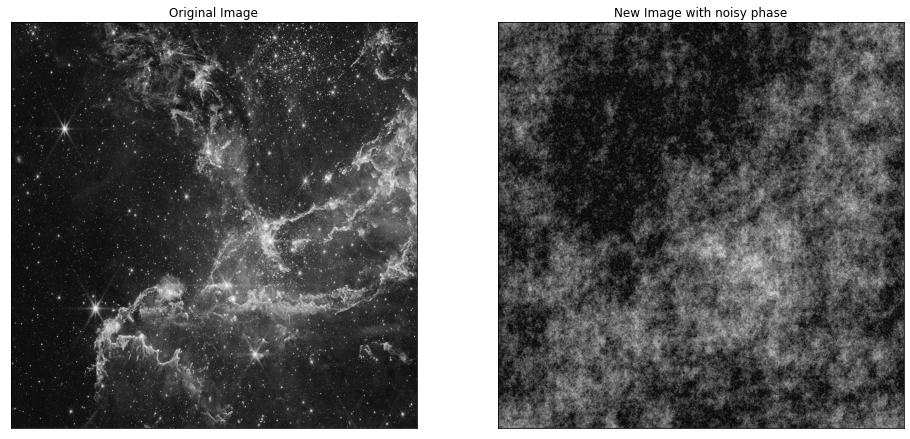

In [64]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(crop_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("New Image with noisy phase")
plt.imshow(new_star_cluster, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()